In [10]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Aigio'
raceDate = '23/4/2023'
surface = 'Tarmac'
competition = 'cup'

link = 'https://www.ewrc-results.com/results/83789-rally-sprint-egion-2023/?s='
startat, no_ss=420212, int(2)

canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [11]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [12]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [13]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [14]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Koukeas E. -,C1,9:33.76,-,110.1,1,Aigio,23/4/2023,Tarmac,cup,1
1,2,#14,Moschos A. -,C3 F2,9:44.77,+11.01 + 11.01,108.0 0.63,1,Aigio,23/4/2023,Tarmac,cup,2
2,3,#2,Nomikos Andrea,C1,9:46.42,+12.66 + 1.65,107.7 0.72,1,Aigio,23/4/2023,Tarmac,cup,3
3,4,#6,Gerodimos Gior,C2,9:53.09,+19.33 + 6.67,106.5 1.10,1,Aigio,23/4/2023,Tarmac,cup,4
4,5,#11,Kapralos D. -,C3 F2,10:01.76,+28.00 + 8.67,105.0 1.60,1,Aigio,23/4/2023,Tarmac,cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,#23,Karouzos Giorg,C4 F2,11:20.16,+1:39.63 + 5.28,92.9 5.68,2,Aigio,23/4/2023,Tarmac,cup,28
28,29,#17,Kopanakis Gior,C4 F2,11:33.58,+1:53.05 + 13.42,91.1 6.44,2,Aigio,23/4/2023,Tarmac,cup,29
29,30,#41,Kassidopoulos,3 1600,11:47.42,+2:06.89 + 13.84,89.3 7.23,2,Aigio,23/4/2023,Tarmac,cup,30
30,31,#42,Mitropoulos Ko,2 2000,12:33.43,+2:52.90 + 46.01,83.9 9.85,2,Aigio,23/4/2023,Tarmac,cup,31


In [15]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [16]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [17]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Koukeas E. -,C1,1,Aigio,23/4/2023,Tarmac,cup,1,573.76
1,Moschos A. -,C3 F2,1,Aigio,23/4/2023,Tarmac,cup,2,584.77
2,Nomikos Andrea,C1,1,Aigio,23/4/2023,Tarmac,cup,3,586.42
3,Gerodimos Gior,C2,1,Aigio,23/4/2023,Tarmac,cup,4,593.09
4,Kapralos D. -,C3 F2,1,Aigio,23/4/2023,Tarmac,cup,5,601.76
...,...,...,...,...,...,...,...,...,...
27,Karouzos Giorg,C4 F2,2,Aigio,23/4/2023,Tarmac,cup,28,680.16
28,Kopanakis Gior,C4 F2,2,Aigio,23/4/2023,Tarmac,cup,29,693.58
29,Kassidopoulos,3 1600,2,Aigio,23/4/2023,Tarmac,cup,30,707.42
30,Mitropoulos Ko,2 2000,2,Aigio,23/4/2023,Tarmac,cup,31,753.43


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race  ss          
Aigio 1     573.76
      2     580.53

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Koukeas E. -,C1,1,Aigio,23/4/2023,Tarmac,cup,1,573.76,573.76,0.00,0.000000,01
1,Moschos A. -,C3 F2,1,Aigio,23/4/2023,Tarmac,cup,2,584.77,573.76,11.01,1.918921,01
2,Nomikos Andrea,C1,1,Aigio,23/4/2023,Tarmac,cup,3,586.42,573.76,12.66,2.206497,01
3,Gerodimos Gior,C2,1,Aigio,23/4/2023,Tarmac,cup,4,593.09,573.76,19.33,3.369004,01
4,Kapralos D. -,C3 F2,1,Aigio,23/4/2023,Tarmac,cup,5,601.76,573.76,28.00,4.880089,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Karouzos Giorg,C4 F2,2,Aigio,23/4/2023,Tarmac,cup,28,680.16,580.53,99.63,17.161904,02
65,Kopanakis Gior,C4 F2,2,Aigio,23/4/2023,Tarmac,cup,29,693.58,580.53,113.05,19.473584,02
66,Kassidopoulos,3 1600,2,Aigio,23/4/2023,Tarmac,cup,30,707.42,580.53,126.89,21.857613,02
67,Mitropoulos Ko,2 2000,2,Aigio,23/4/2023,Tarmac,cup,31,753.43,580.53,172.90,29.783129,02


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Koukeas E. -,C1,1,Aigio,23/4/2023,Tarmac,cup,1,573.76,573.76,0.00,0.000000,01
2,Nomikos Andrea,C1,1,Aigio,23/4/2023,Tarmac,cup,3,586.42,573.76,12.66,2.206497,01
3,Gerodimos Gior,C2,1,Aigio,23/4/2023,Tarmac,cup,4,593.09,573.76,19.33,3.369004,01
15,Daskalopoulos,C2,1,Aigio,23/4/2023,Tarmac,cup,16,636.78,573.76,63.02,10.983687,01
34,Kandiliotis V.,C2,1,Aigio,23/4/2023,Tarmac,cup,35,678.67,573.76,104.91,18.284649,01
37,Koukeas E. -,C1,2,Aigio,23/4/2023,Tarmac,cup,1,580.53,580.53,0.00,0.000000,02
38,Gerodimos Gior,C2,2,Aigio,23/4/2023,Tarmac,cup,2,581.85,580.53,1.32,0.227378,02
39,Nomikos Andrea,C1,2,Aigio,23/4/2023,Tarmac,cup,3,595.82,580.53,15.29,2.633800,02
42,Kandiliotis V.,C2,2,Aigio,23/4/2023,Tarmac,cup,6,605.59,580.53,25.06,4.316745,02
47,Daskalopoulos,C2,2,Aigio,23/4/2023,Tarmac,cup,11,620.36,580.53,39.83,6.860972,02


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race             Aigio       
SS.                 01     02
Crew                         
Daskalopoulos    63.02  39.83
Gerodimos Gior   19.33   1.32
Kandiliotis V.  104.91  25.06
Koukeas E.  -     0.00   0.00
Nomikos Andrea   12.66  15.29

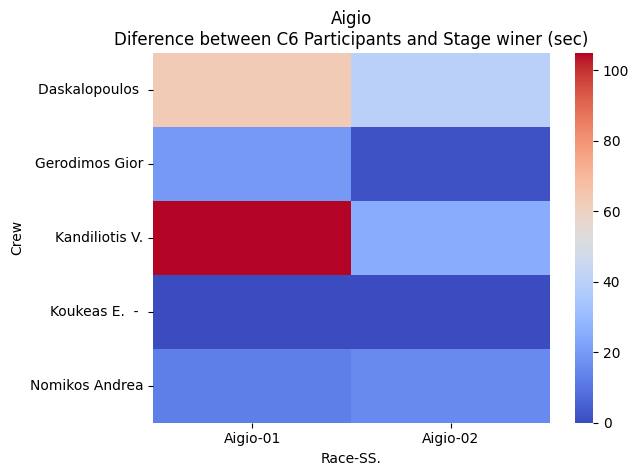

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

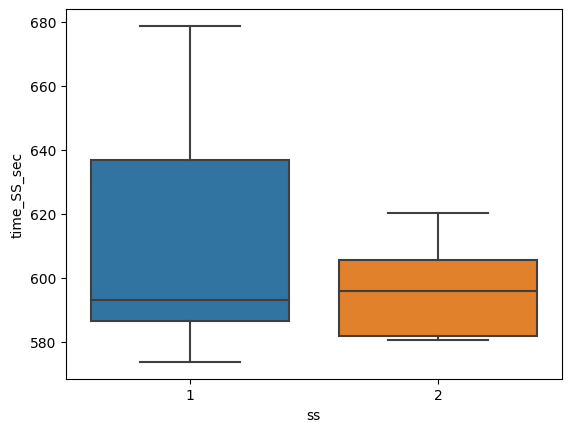

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

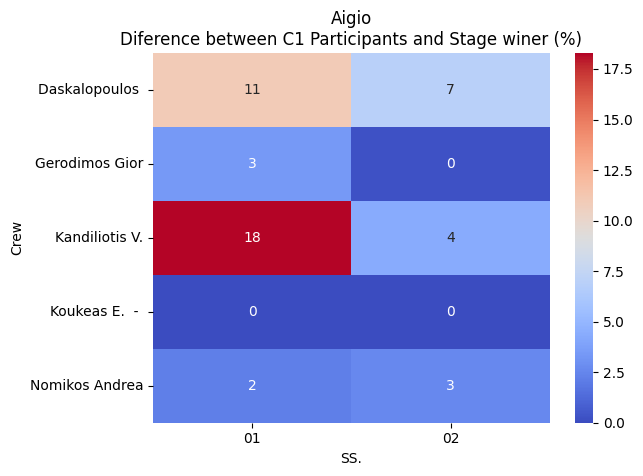

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")